In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv("df_art_1", sep=',')
df2 = pd.read_csv("df_art_2", sep=',')

In [3]:
df1_train = df1.drop('y', axis=1, inplace=False)
df1_class = df1["y"]

In [4]:
df2_train = df2.drop('y', axis=1, inplace=False)
df2_class = df2["y"]

In [5]:
class Adaline():
    
    # FUNÇÃO __INIT__: primeira função que vai rodar quando eu instanciar a classe
    # Método construtor de objetos. Self receberá a instância criada
    def __init__(self, amostras_entrada, saidas, taxa_aprendizado=0.05, epocas=200, bias=-1):
        self.amostras_entrada = amostras_entrada
        self.saidas = saidas
        self.taxa_aprendizado = taxa_aprendizado
        self.epocas = epocas
        self.bias = bias
        self.num_amostras = len(amostras_entrada) # número de padrões do meu dataset
        self.num_atributos = len(amostras_entrada[0]) # número de colunas do mue dataset
        self.vetor_pesos = []
        
    def treino_rede(self):
        
        # Insiro o valor de bias/viés na posição zero para cada padrão da minha lista de amostras_entrada
        for amostra in self.amostras_entrada:
            amostra.insert(0, self.bias)
            
        # Gera valores aleatórios entre 0 e 1 para compor o vetor de pesos, do mesmo tamanho do número de colunas
        for k in range(self.num_atributos):
            self.vetor_pesos.append(random.random())
                    
        # Insere o bias na posição zero do vetor de pesos
        self.vetor_pesos.insert(0, self.bias)
        
        num_epocas = 0 # Inicializa a contagem de épocas
        sum_erros = []
        
        while True:
        
            # Inicializa a variável erro, para poder ser testada ao final do loop. Se continuar falso, não houve mais erro
            erro = False
            sum_erros_epoca = 0
            
            for i in range(self.num_amostras):
                u = 0 # Inicializa a função de ativação
                
                for j in range(self.num_atributos + 1): # +1 pelo fato de ter adicionado o valor do bias
                    u += self.vetor_pesos[j] * self.amostras_entrada[i][j] # Executa o somatório WiXi
                                    
                if u != self.saidas[i]: 
                    erro_true = self.saidas[i] - u # e = d - y
                    sum_erros_epoca += abs(erro_true)

                    for m in range(self.num_atributos + 1): # se há erro, atualiza o vetor de pesos
                        self.vetor_pesos[m] = self.vetor_pesos[m] + self.taxa_aprendizado * erro_true * self.amostras_entrada[i][m]

                    erro = True # se houve erro, continua true/no loop
            
            sum_erros.append(sum_erros_epoca)
            num_epocas += 1 # incrementa o número de épocas
            
            # Condição de saída: caso erro continue False após o teste com o real ou o numero de epocas estoure
            if not erro or num_epocas >= self.epocas:
                #print(self.vetor_pesos)
                break
                      
        return sum_erros
    
    def teste_rede(self, new_amostras): # Função para testar novas amostras
        
        new_amostras.insert(0, self.bias)
        u = 0
        
        for i in range(self.num_atributos + 1):
            u += self.vetor_pesos[i] * new_amostras[i]
            
        return u

In [6]:
def data_test(train_data, class_data, test_size, n_iter):
    
    mse_final = []
    rmse_final = []
    std_final = []
    pred = []
    
    for rep in range(1 , n_iter + 1):
        X_train, X_test, y_train, y_test = train_test_split(train_data,class_data, 
                                                            test_size=test_size, shuffle=True)
        
        amostras = X_train.values.tolist()
        saidas = y_train.values.tolist()
        new_amotras = X_test.values.tolist()
        amostra_teste = y_test.values.tolist()

        rede = Adaline(amostras, saidas)
        J = rede.treino_rede()
        
        epoch = np.linspace(1,len(J),len(J))
        %matplotlib inline
        plt.figure()
        plt.plot(epoch, J, marker='o')
        plt.xlabel('Época')
        plt.ylabel('Somatório do Erro')
        plt.title('Gráfico de Convergência - Adaline')
        plt.show()
        
        y_pred = []
        cj = []
        
        for pd in range(len(new_amotras)):
            
            y = rede.teste_rede(new_amotras[pd])
            y_pred.append(y)
            cj.append(new_amotras[pd][-1])
         
        pred.append(y_pred)
        
        mse = metrics.mean_squared_error(amostra_teste, y_pred)
        rmse = np.sqrt(mse)
        #std = np.sqrt(abs(metrics.explained_variance_score(amostra_teste, y_pred)))
        
        mse_final.append(mse)
        rmse_final.append(rmse)
        #std_final.append(std)
        
        print("Realização {}: MSE = {}, RMSE = {}".format(rep, mse, rmse))
        
    mse_real = np.mean(mse_final)
    rmse_real = np.mean(rmse_final)
    std_real = np.mean(mse_final)
    std_rmse = np.std(rmse_final)
    
    print("\nMSE final = {}, RMSE final = {}, Desvio Padrão MSE = {}, Desvio Padrão RMSE = {}" .format(mse_real, rmse_real, std_real, std_rmse))

    return y_pred, cj

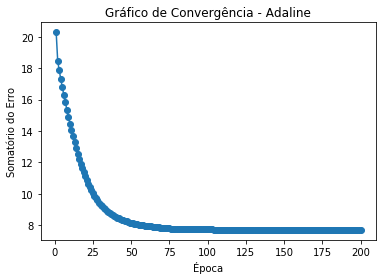

Realização 1: MSE = 0.12165119677266785, RMSE = 0.34878531616550007


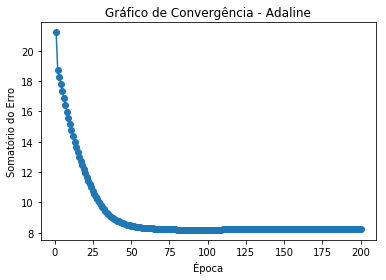

Realização 2: MSE = 0.06378473095242233, RMSE = 0.25255639162852783


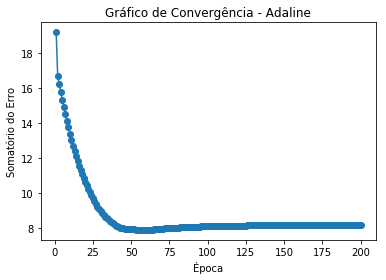

Realização 3: MSE = 0.07663871862202477, RMSE = 0.27683698925906697


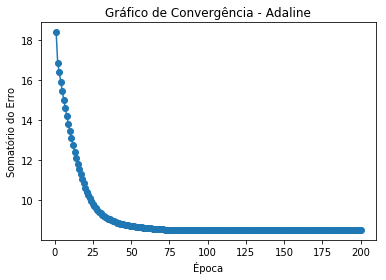

Realização 4: MSE = 0.06453843409142208, RMSE = 0.25404415775888667


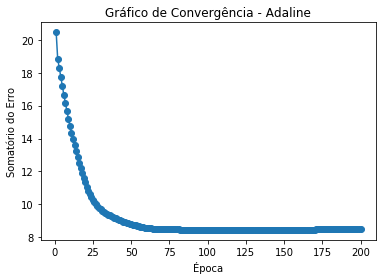

Realização 5: MSE = 0.06725805770555494, RMSE = 0.25934158499082816


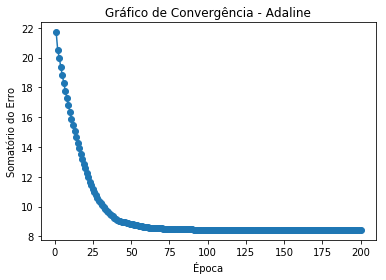

Realização 6: MSE = 0.06338410828081509, RMSE = 0.2517620072227243


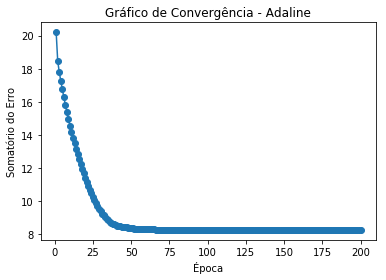

Realização 7: MSE = 0.0664554269391704, RMSE = 0.25778950121983324


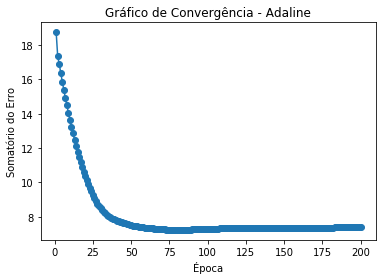

Realização 8: MSE = 0.10628867164697565, RMSE = 0.3260194344620818


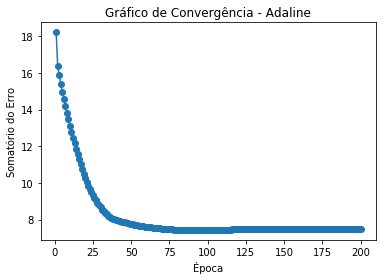

Realização 9: MSE = 0.1008155909719994, RMSE = 0.31751470985136954


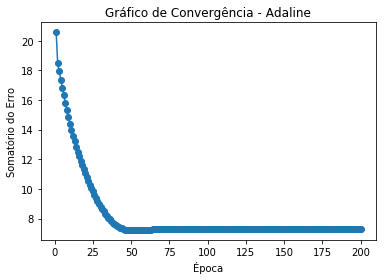

Realização 10: MSE = 0.11974616742625847, RMSE = 0.3460435918005974


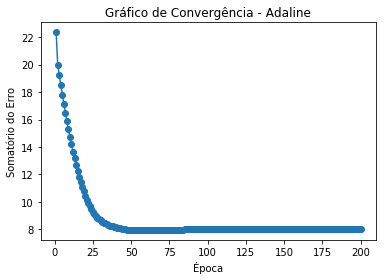

Realização 11: MSE = 0.08777751033651547, RMSE = 0.29627269590111655


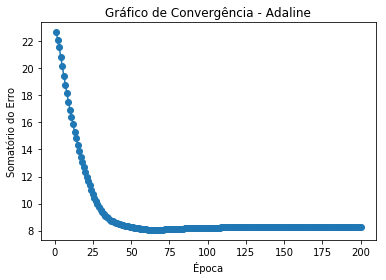

Realização 12: MSE = 0.06944188419031833, RMSE = 0.2635182805619343


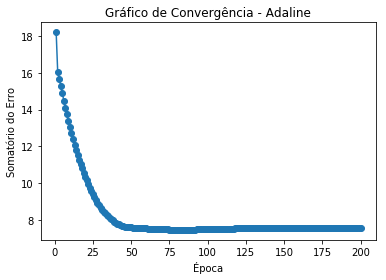

Realização 13: MSE = 0.11325539716763723, RMSE = 0.33653439225083254


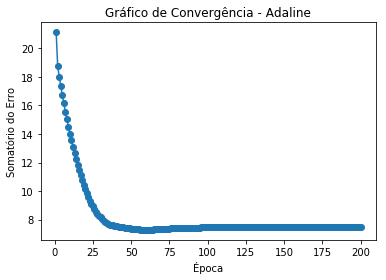

Realização 14: MSE = 0.10175014212981663, RMSE = 0.3189829809407026


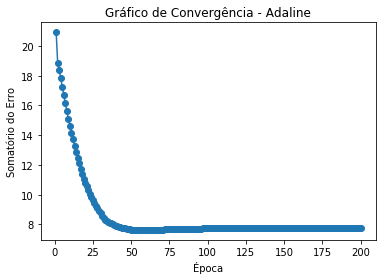

Realização 15: MSE = 0.09635230921082745, RMSE = 0.31040668357950585


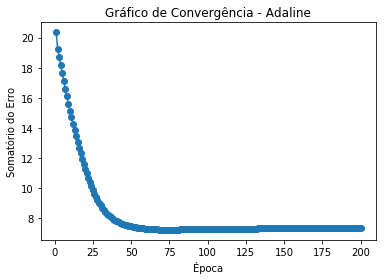

Realização 16: MSE = 0.1254248484027385, RMSE = 0.35415370731186546


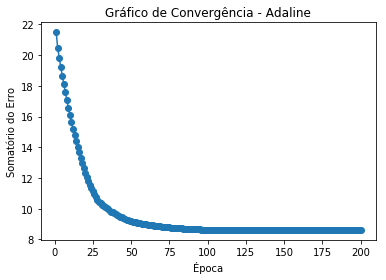

Realização 17: MSE = 0.06199975438301014, RMSE = 0.24899749874850177


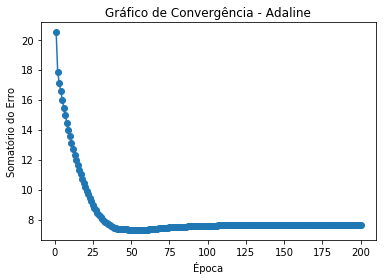

Realização 18: MSE = 0.11331123586544255, RMSE = 0.3366173433818325


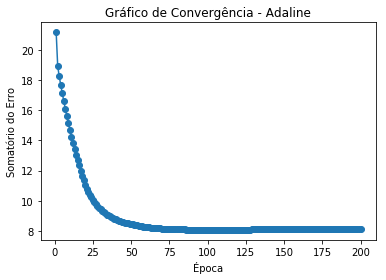

Realização 19: MSE = 0.07618215496459178, RMSE = 0.27601115007294863


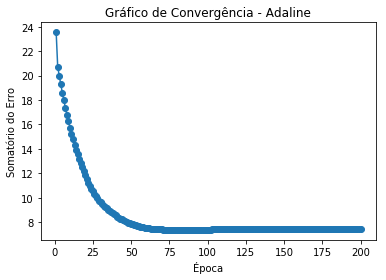

Realização 20: MSE = 0.11895148854234426, RMSE = 0.3448934452006072

MSE final = 0.09075039143012767, RMSE final = 0.2988540931154632, Desvio Padrão MSE = 0.09075039143012767, Desvio Padrão RMSE = 0.037902802775807126


In [7]:
pred1, cjt1 = data_test(df1_train, df1_class, test_size=0.25, n_iter=20)

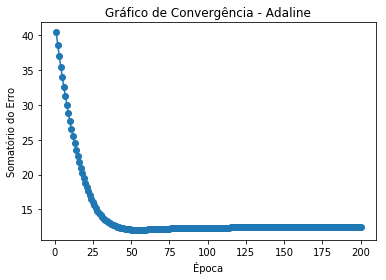

Realização 1: MSE = 0.10206890777621563, RMSE = 0.31948224954794535


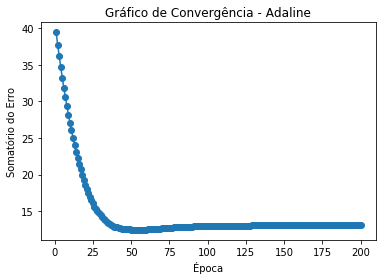

Realização 2: MSE = 0.09663102839506371, RMSE = 0.31085531746306627


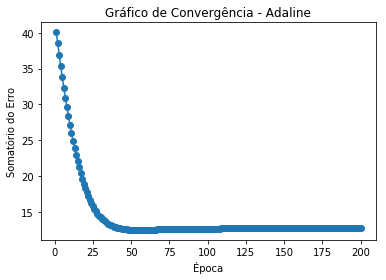

Realização 3: MSE = 0.10749186830445108, RMSE = 0.3278595252611263


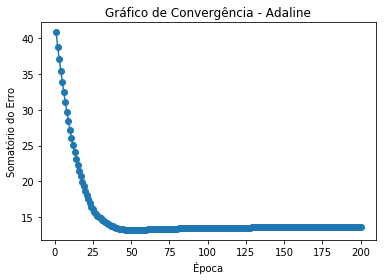

Realização 4: MSE = 0.058674160705704685, RMSE = 0.2422274978314904


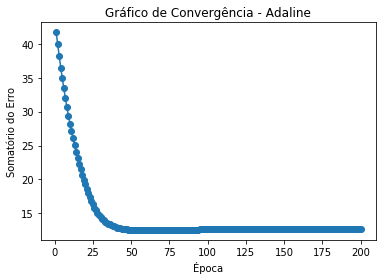

Realização 5: MSE = 0.08942585554233605, RMSE = 0.29904156156349915


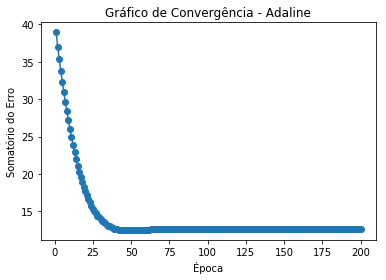

Realização 6: MSE = 0.10864093421183992, RMSE = 0.3296072423534409


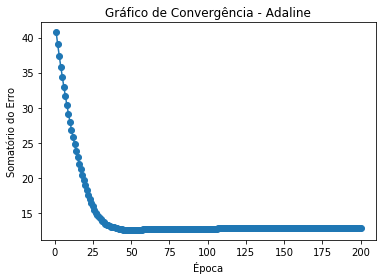

Realização 7: MSE = 0.08692039230412556, RMSE = 0.29482264550764337


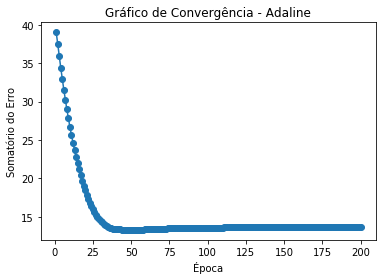

Realização 8: MSE = 0.07007815631796484, RMSE = 0.26472279145922595


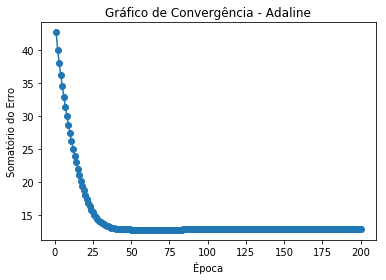

Realização 9: MSE = 0.08762233258593219, RMSE = 0.29601069674241876


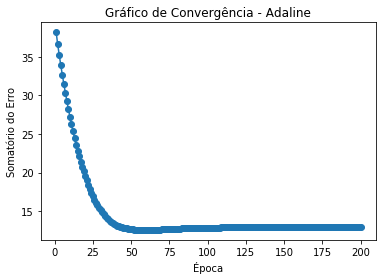

Realização 10: MSE = 0.09015192146761658, RMSE = 0.3002530956836525


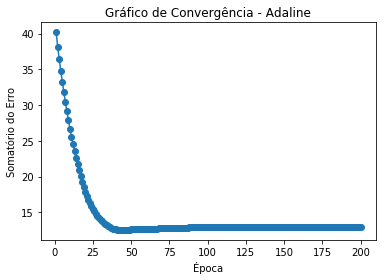

Realização 11: MSE = 0.09236351693162195, RMSE = 0.3039136669049649


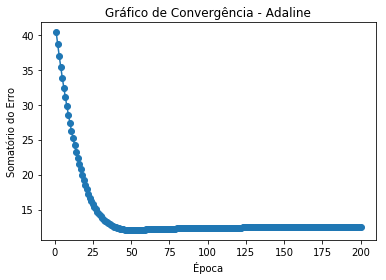

Realização 12: MSE = 0.10014865039721162, RMSE = 0.31646271565100936


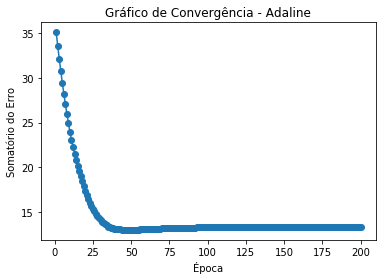

Realização 13: MSE = 0.08527910500671071, RMSE = 0.29202586359209814


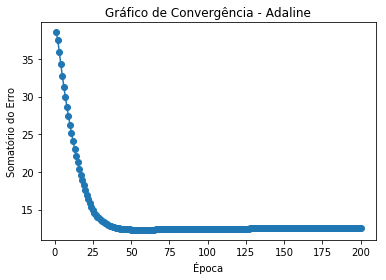

Realização 14: MSE = 0.0900057723755603, RMSE = 0.30000962047167806


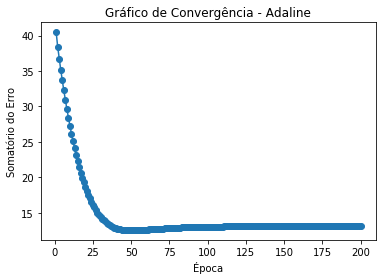

Realização 15: MSE = 0.07707003830925724, RMSE = 0.2776149100989665


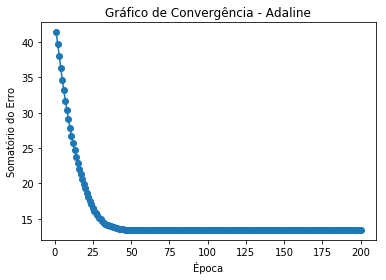

Realização 16: MSE = 0.061877342112230935, RMSE = 0.24875156705482468


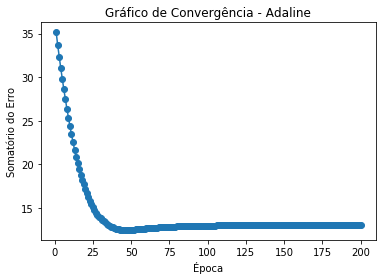

Realização 17: MSE = 0.09147207343236341, RMSE = 0.3024435045299591


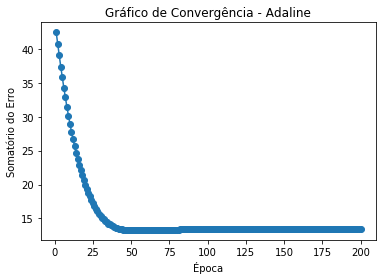

Realização 18: MSE = 0.07671070702892739, RMSE = 0.2769669782283213


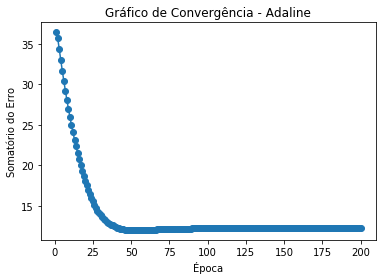

Realização 19: MSE = 0.10122025532283288, RMSE = 0.3181513088497875


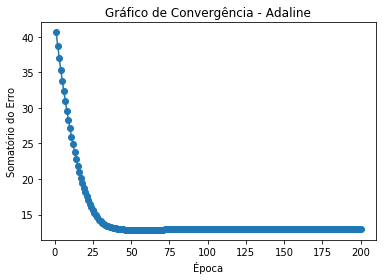

Realização 20: MSE = 0.08863738146868126, RMSE = 0.29772030745093836

MSE final = 0.08812451999983241, RMSE final = 0.2959471533123029, Desvio Padrão MSE = 0.08812451999983241, Desvio Padrão RMSE = 0.023233649006919176


In [8]:
pred2, cjt2= data_test(df2_train, df2_class, test_size=0.25, n_iter=20)

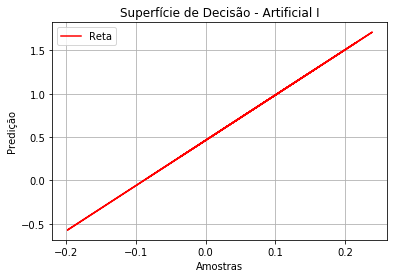

In [9]:
plt.plot(cjt1, pred1, 'r', label='Reta')
plt.legend()
plt.title("Superfície de Decisão - Artificial I")
plt.xlabel("Amostras")
plt.ylabel("Predição")
plt.grid()

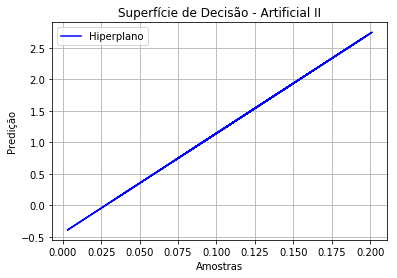

In [10]:
plt.plot(cjt2, pred2, 'b', label='Hiperplano')
plt.legend()
plt.title("Superfície de Decisão - Artificial II")
plt.xlabel("Amostras")
plt.ylabel("Predição")
plt.grid()